## Example Notebook
#### Author: Jennifer Bone
#### Date: Oct 31 2023

### 1. Start with importing libraries
#### Make sure tcrsim.py is in the same folder as your notebook

In [1]:
## Start with imports
import pandas as pd
import numpy as np
import seaborn as sns
import tcrsim


In [2]:
## Import the data from single patient/sample

data = pd.read_csv('test_patient.csv')
display(data)

,pep,copy_number,umi_number
0,AAGRNTTGWFKI,6,3
1,AAISSDWIKT,4,3
2,AAKKL,2,1
3,AALCYYKKL,7,3
4,AAWDAKKL,2,1
...,...,...,...
1149,ERAQGPSFDSKKL,3,1
1150,FFPTTGWFKI,4,1
1151,RIQPDHYYKKL,5,1
1152,VRGGYEKL,6,1


### 2. Run the similarity function on all CDR3s using the top CDR3s as a reference
#### Note: if you choose Num_top_CDR3 > 100 the program will be very slow.

In [4]:
## Run the similarity function for all CDR3s referencing the top CDR3s in a sample

CDR3sim_map = tcrsim.run_all_CDR3s(data,
                               Num_top_CDR3=10)

display(CDR3sim_map)

matrix is made


Processing:   0%|          | 0/10 [00:00<?, ?item/s]

0_loop


Processing: 100%|██████████| 10/10 [00:58<00:00,  5.87s/item]


,umi_percent,umi_number,ATWDHL,ALWEVHAYYKKL,ATWDYKKL,ALWDTMNYYKKL,ALWEVRSSDWIKT,ATWDGRTTGWFKI,ATWDDYYKKL,ATWDLLEKL,ALWEVHLNYYKKL,ATWDRREKL
ATWDHL,48.914916,19880,100.000000,16.666667,50.000000,25.000000,15.384615,30.769231,40.000000,55.555556,15.384615,44.444444
ALWEVHAYYKKL,13.025934,5294,16.666667,100.000000,33.333333,66.666667,38.461538,15.384615,41.666667,16.666667,61.538462,16.666667
ATWDYKKL,8.820924,3585,50.000000,33.333333,100.000000,33.333333,15.384615,30.769231,40.000000,44.444444,30.769231,44.444444
ALWDTMNYYKKL,4.357561,1771,25.000000,66.666667,33.333333,100.000000,23.076923,23.076923,41.666667,25.000000,46.153846,25.000000
ALWEVRSSDWIKT,1.973328,802,15.384615,38.461538,15.384615,23.076923,100.000000,38.461538,15.384615,15.384615,46.153846,23.076923
...,...,...,...,...,...,...,...,...,...,...,...,...
ATWDGPLDYKKL,0.002461,1,33.333333,50.000000,41.666667,58.333333,15.384615,38.461538,33.333333,33.333333,38.461538,33.333333
ATWDGPLHYKKL,0.002461,1,33.333333,50.000000,33.333333,58.333333,15.384615,38.461538,33.333333,33.333333,38.461538,33.333333
ATWDGPLNYYKKL,0.002461,1,30.769231,38.461538,30.769231,46.153846,23.076923,46.153846,38.461538,30.769231,69.230769,30.769231
ATWDGPLYHKKL,0.002461,1,33.333333,50.000000,33.333333,58.333333,15.384615,38.461538,33.333333,33.333333,30.769231,33.333333


### 3. This is code to look at each individual top CDR3 and the related similar CDR3s


In [5]:
# Display the top 10 rank CDR3s
topCDR3s = CDR3sim_map.iloc[:10,:2].reset_index()
topCDR3s.insert(1,'rank',list(range(1, 11)))
display(topCDR3s)

,index,rank,umi_percent,umi_number
0,ATWDHL,1,48.914916,19880
1,ALWEVHAYYKKL,2,13.025934,5294
2,ATWDYKKL,3,8.820924,3585
3,ALWDTMNYYKKL,4,4.357561,1771
4,ALWEVRSSDWIKT,5,1.973328,802
5,ATWDGRTTGWFKI,6,1.968407,800
6,ATWDDYYKKL,7,1.953644,794
7,ATWDLLEKL,8,1.929039,784
8,ALWEVHLNYYKKL,9,0.979283,398
9,ATWDRREKL,10,0.962059,391


In [17]:
# You'll have to run this for each of the top CDR3s, changing CDR3map.columns[2] --> CDR3mao.columns[3] and so on.

# Top CDR3 compared to all others in the list. You have to start at column 2 (see below #v) because 0,1 are the columns related to umi counts:
# NOTE: you can set the similarity threshold to be higher than 70% using sim_threshold

######################################     First top CDR3 compared to all others
                           
    
cdr3_1 = CDR3sim_map.columns[2]
topCDR3_1 = tcrsim.filtersimilarity(CDR3sim_map,
                                    cdr3=cdr3_1,
                                    umi_cols =['umi_percent','umi_number'],
                                    truncate=True,
                                    sim_threshold=70)
display(topCDR3_1)





######################################      Second top CDR3 compared to all others


cdr3_2 = CDR3sim_map.columns[3]
topCDR3_2 = tcrsim.filtersimilarity(CDR3sim_map,
                                    cdr3=cdr3_2,
                                    umi_cols =['umi_percent','umi_number'],
                                    truncate=True,
                                    sim_threshold=70)
display(topCDR3_2)





,umi_percent,umi_number,ATWDHL
ATWDHL,48.914916,19880,100.000000
ATWDLL,0.012303,5,83.333333
ATWDCL,0.009842,4,83.333333
ATRDHL,0.002461,1,83.333333
ATWGHL,0.137788,56,83.333333
ATWDHP,0.140249,57,83.333333
ATWDHH,0.002461,1,83.333333


,umi_percent,umi_number,ALWEVHAYYKKL
ALWEVHAYYKKL,13.025934,5294,100.000000
ALWEVREYYKKL,0.012303,5,83.333333
ALWEVQNYYKKL,0.007382,3,83.333333
ALWEVSNYYKKL,0.009842,4,83.333333
ALWEAHSYYKKL,0.002461,1,83.333333
ALWESTRYYKKL,0.002461,1,75.000000
ALWEPLNYYKKL,0.004921,2,75.000000
ALWEVLDRYKKL,0.004921,2,75.000000


### 4. Finally, we can demonstrate some maps between similar sequences
#### Note: As you can see here, these two sequences are nearly the same, except they differ by a single AA (0) in the middle on the main diagonal

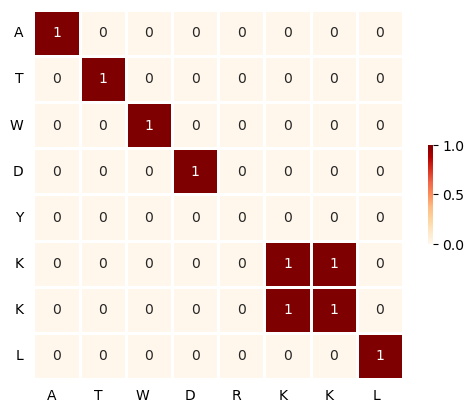

In [7]:
# Run the distance matrix function

tcrsim_visual = tcrsim.distance_matrix(string1='ATWDYKKL',
                                       string2='ATWDRKKL',
                                       show_heatmap=True)

